First, you need to upload the ZIP file to Google Colab. You can do this by clicking on the "Files" icon on the left-hand side of the Colab interface, then clicking on "Upload" and selecting the ZIP file from your local machine.

Next, you need to unzip the file. You can do this using the zipfile module in Python. Here's some example code to do this:
extract the files from the ZIP file in the current working directory.

In [ ]:

import zipfile

with zipfile.ZipFile('API_SP.POP.TOTL_DS2_en_csv_v2_4770387.zip', 'r') as zip_ref:
    zip_ref.extractall()

load the CSV file into a DataFrame and skip the first 4 rows, which contain metadata about the data.

In [ ]:

import pandas as pd

df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_4770387.csv', skiprows=4)

create a new DataFrame called egypt_data that contains only the rows where the "Country Name" column is "Egypt, Arab Rep.".

In [ ]:

egypt_data = df[df['Country Name'] == 'Egypt, Arab Rep.']

save the egypt_data DataFrame to a new CSV file called "egypt_population.csv" in the current working directory.

In [ ]:
egypt_data.to_csv('egypt_population.csv', index=False)

Load the CSV file into a pandas DataFrame

In [ ]:
import pandas as pd

egypt_data = pd.read_csv('egypt_population.csv')

remove the 'Unnamed: 66' column from the egypt_data DataFrame.

In [ ]:
egypt_data = egypt_data.drop('Unnamed: 66', axis=1)

show you the number of rows and columns in the DataFrame after dropping missing values.

In [ ]:
egypt_data.shape

(1, 66)

In [ ]:
egypt_data['Indicator Name'].unique()

array(['Population, total'], dtype=object)

In [ ]:
print(egypt_data['Indicator Name'].unique())

['Population, total']


show you the first few rows of the data.

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
egypt_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Egypt, Arab Rep.",EGY,"Population, total",SP.POP.TOTL,27034499.0,27747867.0,28485022.0,29245936.0,30026648.0,30818469.0,...,91240376.0,93377890.0,95592324.0,97723799.0,99784030.0,101789386.0,103740765.0,105618671.0,107465134.0,109262178.0


create a line graph showing the population of Egypt over time.
the population of Egypt appears to be increasing from 2011 to 2021, so the line graph is going up.

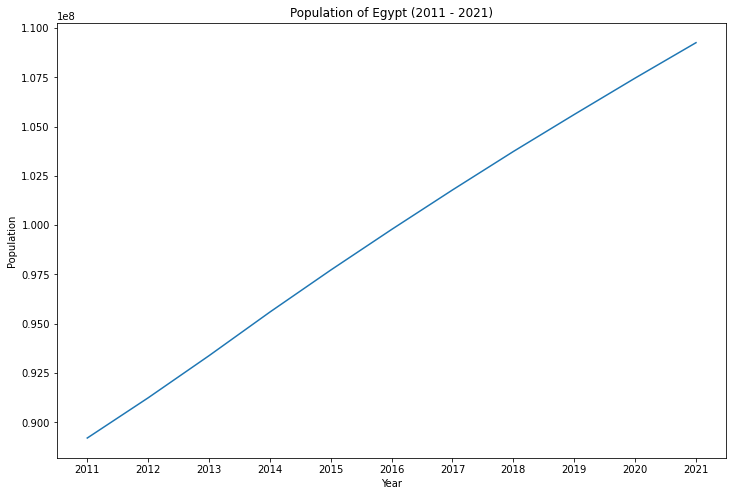

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Set the x-axis to be the years from 1960 to 2021
x = [str(year) for year in range(2011, 2022)]

# Set the y-axis to be the population of Egypt
y = egypt_data.loc[egypt_data['Indicator Name'] == 'Population, total', '2011':'2021'].values[0]

# Plot the line graph
plt.figure(figsize=(12,8))
plt.plot(x, y)

# Add a title and axis labels
plt.title('Population of Egypt (2011 - 2021)')
plt.xlabel('Year')
plt.ylabel('Population')

# Show the plot
plt.show()

annual population growth rate of Egypt is being calculated and plotted over time. Since the growth rate is declining from year to year, the line graph is going down. This suggests that the population growth rate is decreasing over time.

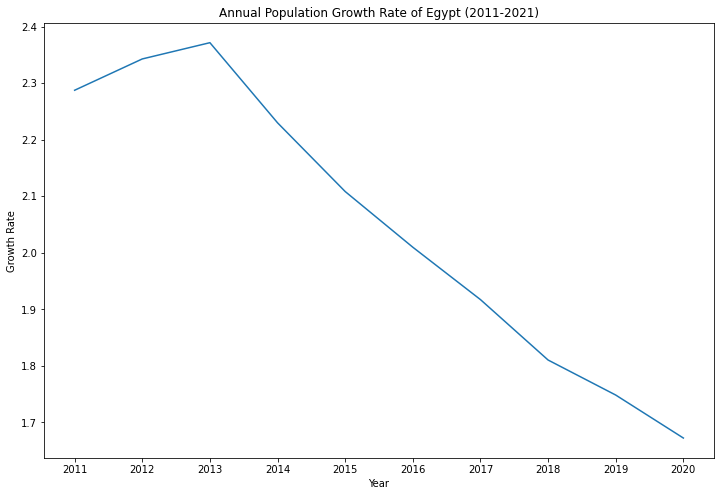

In [ ]:
# Calculate the annual population growth rate
populations = egypt_data.loc[egypt_data['Indicator Name'] == 'Population, total', '2011':'2021'].values[0]
growth_rates = [(populations[i] - populations[i-1]) / populations[i-1] * 100 for i in range(1, len(populations))]

# Set the x-axis to be the years from 2011 to 2021
x = [str(year) for year in range(2011, 2021)]

# Plot the line graph of the growth rates over time
plt.figure(figsize=(12,8))
plt.plot(x, growth_rates)

# Add a title and axis labels
plt.title('Annual Population Growth Rate of Egypt (2011-2021)')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

# Show the plot
plt.show()

choropleth map of the world, with each country colored based on its population in 2021. The map will also display the name of each country when you hover over it.

In [ ]:
import plotly.express as px
import pandas as pd

# Load the dataset
data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_4770387.csv', skiprows=4 )

# Filter the dataset to include only the year 2021
data_2021 = data[["Country Name", "Country Code", "2021"]]

# Create the choropleth map
fig = px.choropleth(data_2021, locations="Country Code",
                    color="2021", 
                    hover_name="Country Name",
                    title="World Population 2021")
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Load the dataset
data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_4770387.csv', skiprows=4)

# Filter the dataset to include only the population data for Egypt
egypt_data = data.loc[data['Country Name'] == 'Egypt, Arab Rep.']

# Reshape the data to long format
egypt_data = egypt_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                             var_name='Year', value_name='Population')

# Create the line chart
fig = px.line(egypt_data, x='Year', y='Population',
              title='Population Trend for Egypt, 1960-2021')

fig.show()

a bar chart with the population of China, India, the United States,Egypt, Sudan, and Libya

In [ ]:
# Define a list of countries to include
countries = ['Egypt, Arab Rep.', 'Sudan', 'Libya', 'Saudi Arabia', 'China', 'United States', 'India']

# Filter the dataset to include only the selected countries and the year 2021
data_selected = data.loc[data['Country Name'].isin(countries), ['Country Name', '2021']]
data_selected = data_selected.rename(columns={'Country Name': 'Country'})

# Create the horizontal bar chart
fig = px.bar(data_selected, x='2021', y='Country', orientation='h', text='2021',
             title='Total Population of Selected Countries in 2021')
fig.update_layout(xaxis_title='Total Population', yaxis_title=None)
fig.show()

create a bubble chart with the population of the seven countries over the years 2010-2020. The x-axis represents the year, the y-axis represents the countries, and the size of the bubble represents the population.

In [ ]:

# Filter the dataset to include only the years 2010 to 2020
years = [str(year) for year in range(2010, 2021)]
data = data[["Country Name", "Country Code"] + years]

# Filter the data to include only the countries of interest
countries = ["Egypt, Arab Rep.", "Sudan", "Libya", "Saudi Arabia", "China", "United States", "India"]
data = data[data["Country Name"].isin(countries)]

# Melt the data to "long" format
data_melt = data.melt(id_vars=["Country Name", "Country Code"], value_vars=years, var_name="Year", value_name="Population")

# Convert the year column to a date object for better formatting
data_melt["Year"] = pd.to_datetime(data_melt["Year"], format="%Y")

# Create the bubble chart
fig = px.scatter(data_melt, x="Year", y="Country Name", size="Population", color="Country Name",
                 title="Population of Selected Countries (2010-2020)",
                 labels={
                     "Year": "Year",
                     "Country Name": "Country",
                     "Population": "Population (millions)"
                 },
                 hover_name="Country Name", hover_data={"Population": ":,.2f"})
fig.show()

In [ ]:

import plotly.graph_objs as go
# create a list of years to be used as the x-axis
years = list(map(str, range(1960, 2022)))

# create a trace for the heatmap
trace = go.Heatmap(x=years,
                   y=data['Country Name'],
                   z=data[years].values,
                   colorscale='Viridis')

# create the layout for the heatmap
layout = go.Layout(title='Population of Countries Over Time',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Country'))

# create the figure object
fig = go.Figure(data=[trace], layout=layout)

# display the heatmap
fig.show()

In [ ]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,59106.0,58816.0,58855.0,59365.0,60028.0,60715.0,61193.0,61465.0,61738.0,62006.0,62267.0,...,84355.0,86867.0,89101.0,90691.0,91781.0,92701.0,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,167596160.0,172475766.0,177503186.0,182599092.0,187901657.0,193512956.0,199284304.0,205202669.0,211120911.0,217481420.0,224315978.0,230967858.0,...,381715600.0,391486231.0,401600588.0,412001885.0,422741118.0,433807484.0,445281555.0,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,10494489.0,10752971.0,11015857.0,11286753.0,11575305.0,11869879.0,12157386.0,12425267.0,12687301.0,12938862.0,12986369.0,12486631.0,...,18493132.0,19262847.0,19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,118615741.0,121424797.0,124336039.0,127364044.0,130563107.0,133953892.0,137548613.0,141258400.0,145122851.0,149206663.0,153459665.0,157825609.0,...,255482918.0,262397030.0,269611898.0,277160097.0,284952322.0,292977949.0,301265247.0,309824829.0,318601484.0,327612838.0,336893835.0,346475221.0,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,5928386.0,6029700.0,6177049.0,6364731.0,6578230.0,6802494.0,7032713.0,7266780.0,7511895.0,7771590.0,8043218.0,8330047.0,...,15366864.0,15870753.0,16394062.0,16941587.0,17516139.0,18124342.0,18771125.0,19450959.0,20162340.0,20909684.0,21691522.0,22507674.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,...,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,6673981.0,6843607.0,7024196.0,7215835.0,7417736.0,7630190.0,7855657.0,8094985.0,8348182.0,8615301.0,8899922.0,9204938.0,...,17

In [ ]:
print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')
